In [24]:
%pylab inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os


Populating the interactive namespace from numpy and matplotlib


In [79]:
file_list[i][6:14]

'20160815'

In [82]:
#cwd = os.getcwd()
#os.path.join(cwd,r'TopoBathy\timeseries_line29\topo')
file_dir = os.path.join(os.getcwd(),r'TopoBathy\timeseries_line29\topo')
file_list = os.listdir(file_dir)

bathy_fname = r'.\TopoBathy\timeseries_line29\bathy\sedex_20160802_line029.XYZ'
bathy = pd.read_csv(bathy_fname,sep='\t',names=['x','y','z'])

for i in range(len(file_list)):
    topo_fname = os.path.join(file_dir,file_list[i])
    topo = pd.read_csv(topo_fname,sep=' ',names=['x','y','z'])
    plt.figure(figsize(5,3))
    plt.plot(bathy.x,bathy.z)
    plt.plot(topo.x,topo.z)
    plt.ylim(-12,6)
    plt.xlim(224500,227000)
    plt.title('topo_' + file_list[i][6:14])
    plt.savefig(os.path.join(os.getcwd(),r'TopoBathy\timeseries_line29','test%i.png' % i),dpi=600)
    plt.close


    

    

SyntaxError: invalid syntax (<ipython-input-82-43d51cf88062>, line 9)

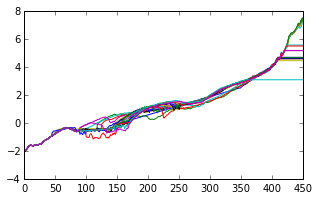

In [150]:
#plt.figure(figsize(5,3))
#plt.plot(bathy.x,bathy.z)
#plt.plot(topo.x,topo.z)
#plt.ylim(-2,6)
#plt.xlim(226500,227000)
file_dir = os.path.join(os.getcwd(),r'TopoBathy\timeseries_line29\topo')
file_list = os.listdir(file_dir)

bathy_fname = r'.\TopoBathy\timeseries_line29\bathy\sedex_20160802_line029.XYZ'
bathy = pd.read_csv(bathy_fname,sep='\t',names=['x','y','z'])

x_model= np.arange(0, 450.0, 1)
np.savetxt(os.path.join(os.getcwd(),r'TopoBathy\model_series','x.txt'),x_model)
np.savetxt(os.path.join(os.getcwd(),r'TopoBathy\model_series','y.txt'),zeros(x_model.shape))



for i in range(len(file_list)):
    topo_fname = os.path.join(file_dir,file_list[i])
    topo = pd.read_csv(topo_fname,sep=' ',names=['x','y','z'])
    
    x_temp = np.concatenate((bathy.x,topo.x[::-1]),axis=0)-226500
    z_temp = np.concatenate((bathy.z,topo.z[::-1]),axis=0)
    z_model_int= np.interp(x_model, x_temp[~np.isnan(z_temp)], z_temp[~np.isnan(z_temp)])

    plt.plot(z_model_int)
    np.savetxt(os.path.join(os.getcwd(),r'TopoBathy\model_series','z_epoch_%i.txt' % i),z_model_int)

                       
                       
    
    #lets interpoltate on 1 m grids
    

In [157]:
print 'z_epoch_%i.txt loaded' % 5


z_epoch_5.txt loaded


224496.22
224500.0
20160812


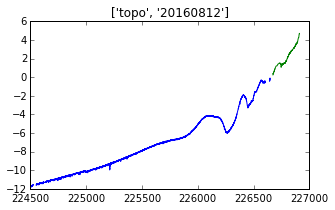

In [23]:
# read all files and make x y z matrices
topo_fname = r'.\TopoBathy\timeseries_line29\topo\SEDEX_20160812_line029_t_processed.XYZ'
bathy_fname = r'.\TopoBathy\timeseries_line29\bathy\sedex_20160802_line029.XYZ'

bathy = pd.read_csv(bathy_fname,sep='\t',names=['x','y','z'])
topo = pd.read_csv(topo_fname,sep=' ',names=['x','y','z'])

# y = constant (142950) for topo so we can use x as cross shore direction.
# for bathy we have to interpolate to y = 142950
# let's interpolate 1 meter spacing
plt.figure(figsize(5,3))
plt.plot(bathy.x,bathy.z)
plt.plot(topo.x,topo.z)
#print topo.y
print bathy.x.min()
print topo.x.min()
#remove nans and interpolate on regular intervals
#now interpolate to line
plt.ylim(-12,6)
plt.xlim(224500,227000)
plt.title(['topo',topo_fname[41:49]])
plt.savefig('test.png',dpi=600)
print topo_fname[41:49]

In [ ]:
x_model= np.arange(0, 2600.0, 1)
z_model_int= np.interp(x_model,d_model[~np.isnan(z_model)],z_model[~np.isnan(z_model)])
plt.plot(x_model,z_model_int)
plt.xlim(1900,2600)
plt.ylim(-5,12)

x_model[1900:2600].shape

In [ ]:
# now export x.txt, y.txt and z.txt
# let consider the 1900-2600m domain
np.savetxt('xtest.txt',x_model[1900:2600])
np.savetxt('ytest.txt',zeros(x_model[1900:2600].shape))
np.savetxt('ztest.txt',z_model_int[1900:2600])